In [1]:
import pandas as pd

In [2]:
#서울 열린광장 데이터 cctv
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

### 판다스 DataFrame의 칼럼이름 변경하기
* df.rename(columns={'old_nm' : 'new_nm'}, inplace=True)
* df.columns=['a','b']

In [5]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '기관명'}, inplace=True)
CCTV_Seoul.head(1)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932


In [7]:
CCTV_Seoul.rename(columns={'구별' : '기관명', '소계' : '소계1'}, inplace=True)
CCTV_Seoul.head(1)

,기관명,소계1,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932


In [8]:
CCTV_Seoul.columns=['구별','소계','2013년도 이전','2014년','2015년','2016년']
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932


### 엑셀파일 읽기 - 서울시 인구현황

In [9]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [10]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls',
                          header = 2,
                          usecols = 'B, D, G, J, N') #parse_cols
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [11]:
pop_Seoul.info() # 데이터프레임 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       26 non-null     object 
 1   계         26 non-null     float64
 2   계.1       26 non-null     float64
 3   계.2       26 non-null     float64
 4   65세이상고령자  26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [12]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0


In [13]:
pop_Seoul.columns=['구별','총인구수','한국인','외국인','고령자']
pop_Seoul.head(1)

,구별,총인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0


### CCTV 데이터 파악하기
* 데이터 정제

In [14]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [15]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5) #하위5개

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [16]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5) #상위5개

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [17]:
#최근 3년간 증가율 = (2016+2015+2014) / 2013년도 이전 *100

CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                      CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


### 서울시 인구데이터 파악하기

In [18]:
pop_Seoul.head()

,구별,총인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [19]:
pop_Seoul.drop([0], inplace=True) # 행삭제
pop_Seoul.head()

,구별,총인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [20]:
pop_Seoul['구별'].unique() #데이터 확인

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [21]:
#isnull 명령어로 누락값 데이터 추출
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,총인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [22]:
pop_Seoul.tail(2)

,구별,총인구수,한국인,외국인,고령자
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [23]:
pop_Seoul.drop([26], inplace=True) #NaN 행 삭제
pop_Seoul.tail(2)

,구별,총인구수,한국인,외국인,고령자
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [24]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['총인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['총인구수'] * 100
pop_Seoul.head()

,구별,총인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [25]:
#인구수는 송파구, 강서구, 강남구, 노원구, 관아구 순으로 많다
pop_Seoul.sort_values(by='총인구수', ascending=False).head(5)

,구별,총인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [26]:
#외국인 숫자는 영등포구, 구로구, 금천구, 관악구, 동대문구 순으로 많다
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,총인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [27]:
#외국인 비율이 높은 구는 영등포구, 금천구, 구로구, 중구, 용산구
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,총인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [28]:
#고령자가 많은 구는?
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,총인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [29]:
#고령자 비율이 높은 구는?
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,총인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


### CCTV 데이터와 인구 데이터 합치고 분석하기

In [30]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,총인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [31]:
#drop - 행 방향 삭제, del - 열삭제
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,총인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [32]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,총인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [33]:
#CCTV 개수와 고령자 비율은 약한 음의 상관관계
import numpy as np
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [34]:
#인구수와는 0.3으로 약한 상관관계
np.corrcoef(data_result['총인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [35]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,총인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [36]:
data_result.sort_values(by='총인구수', ascending=False).head(5)

,소계,최근증가율,총인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### CCTV와 인구현황 그래프로 분석하기

In [37]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False # - 기호 깨지는것 방지
#f_path = "/Library/Fonts/AppleGothic.ttf" (맥)
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [38]:
data_result.head()

,소계,최근증가율,총인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


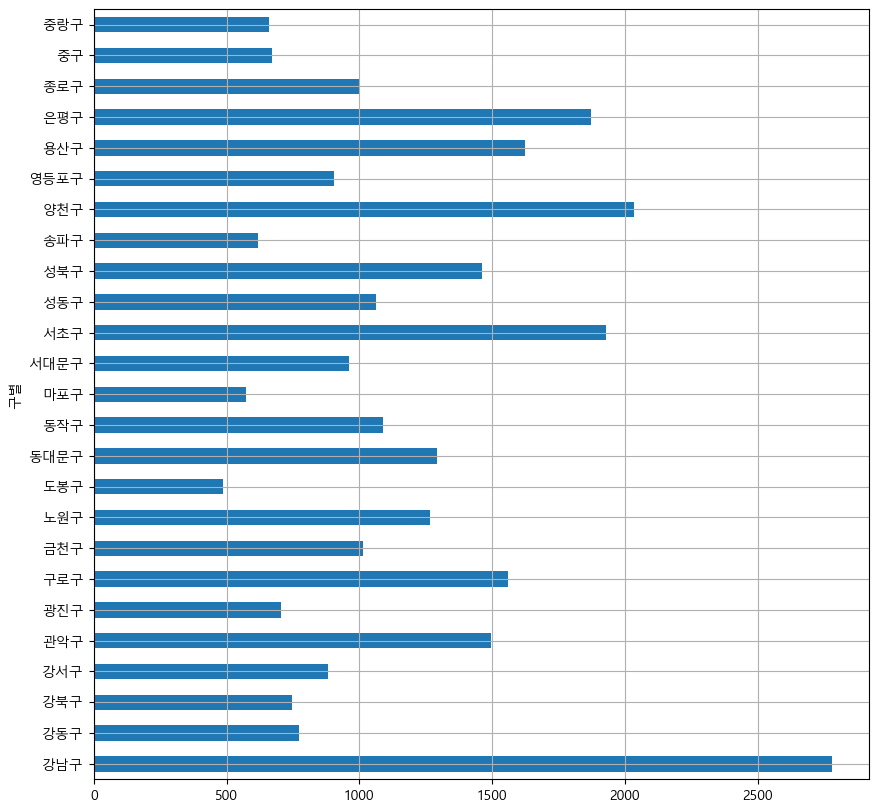

In [39]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10, 10)) # kind='barh' 가로형
plt.show()

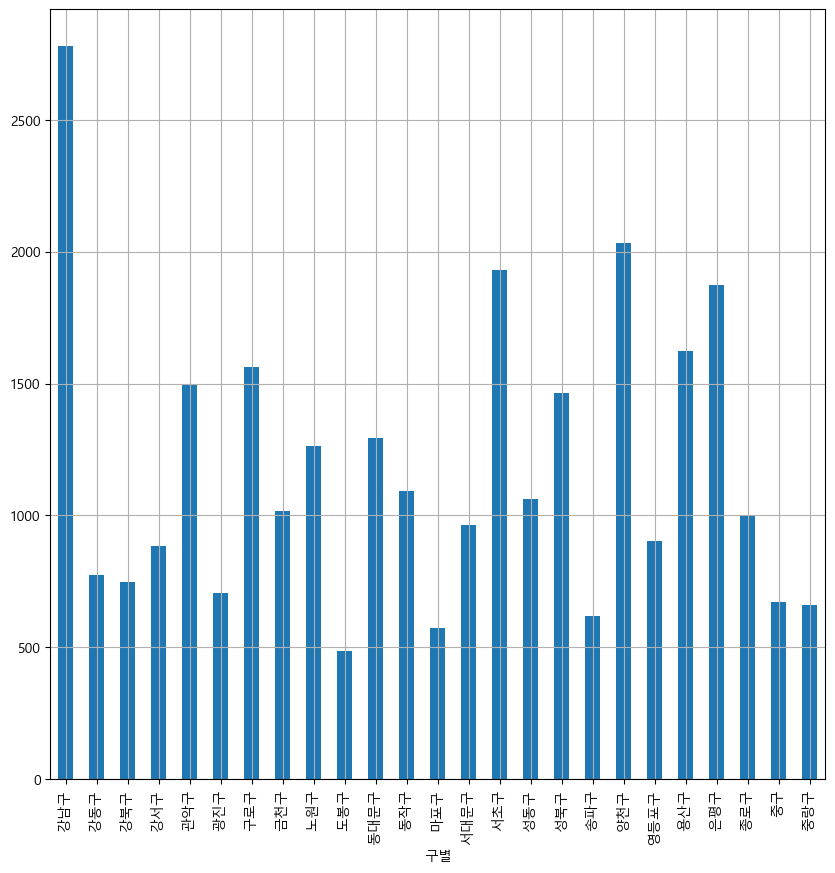

In [40]:
plt.figure()
data_result['소계'].plot(kind='bar', grid=True, figsize=(10, 10)) # kind='bar' 세로형
plt.show()

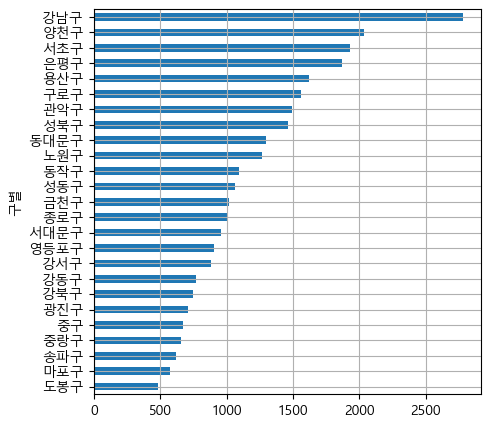

In [41]:
#강남구에 cctv가 많이 설치되어 있음을 확인
plt.figure()
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(5, 5)) #figsize=(5, 5) 그래프 사이즈 설정
plt.show()

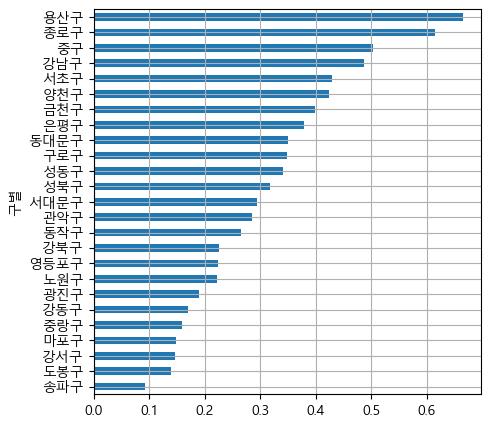

In [42]:
#인구 대비 cctv 비율이 높은 곳은 용산,종로,중구,강남구
data_result['CCTV비율'] = data_result['소계'] / data_result['총인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(5, 5)) #figsize=(5, 5) 그래프 사이즈 설정
plt.show()

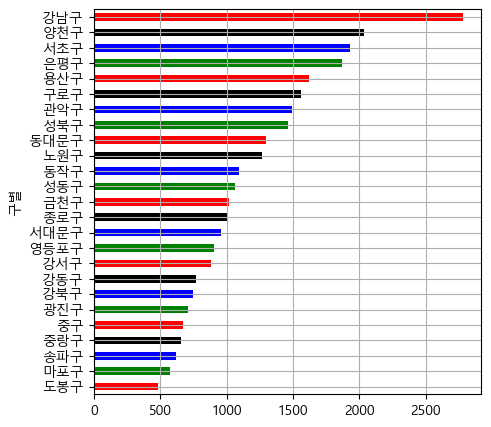

In [43]:
import seaborn as sns
colors = list('rgbk') # 그래프 색상설정
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(5, 5), color = colors)
plt.show()

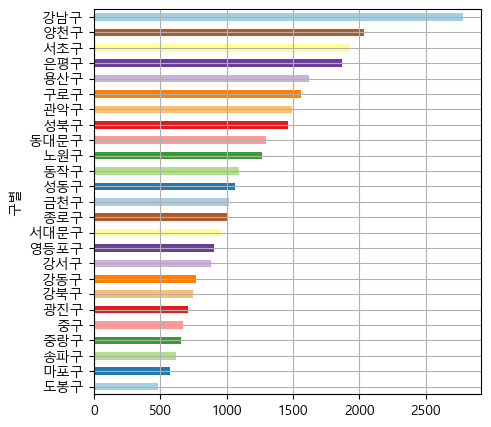

In [44]:
colors = sns.color_palette("Paired", len(data_result.index)) # 그래프 색상설정 https://seaborn.pydata.org/tutorial/color_palettes.html
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(5, 5), color = colors)
plt.show()

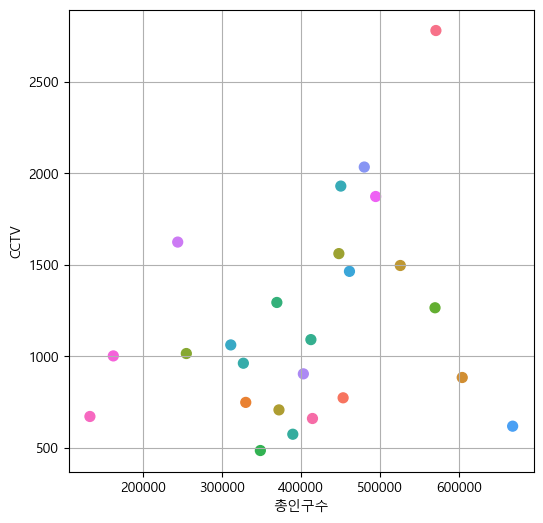

In [45]:
colors = sns.color_palette("husl", len(data_result.index))
plt.figure(figsize=(6,6))
plt.scatter(data_result['총인구수'], data_result['소계'], s=50, color = colors)
plt.xlabel('총인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [46]:
# 기울기, 절편, 1차원
# y=ax+b(a=기울기, b=절편)
fp1 = np.polyfit(data_result['총인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [47]:
#polynomial
f1 = np.poly1d(fp1) # 매개변수로부터 모델 생성
fx = np.linspace(100000, 700000, 100) # 시작, 끝(포함), 갯수

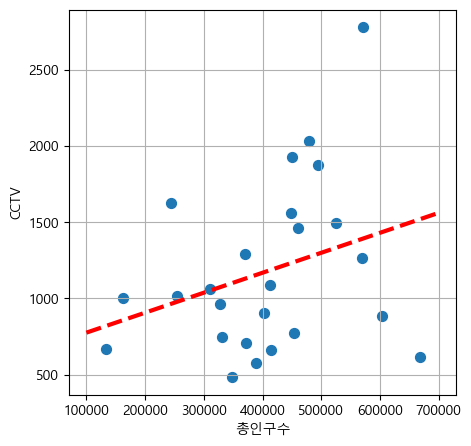

In [48]:
plt.figure(figsize=(5,5))
plt.scatter(data_result['총인구수'], data_result['소계'], s=50)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='r')
plt.xlabel('총인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

### 조금더 설득력 있는 자료 만들기

In [49]:
fp1 = np.polyfit(data_result['총인구수'], data_result['소계'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['총인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,총인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


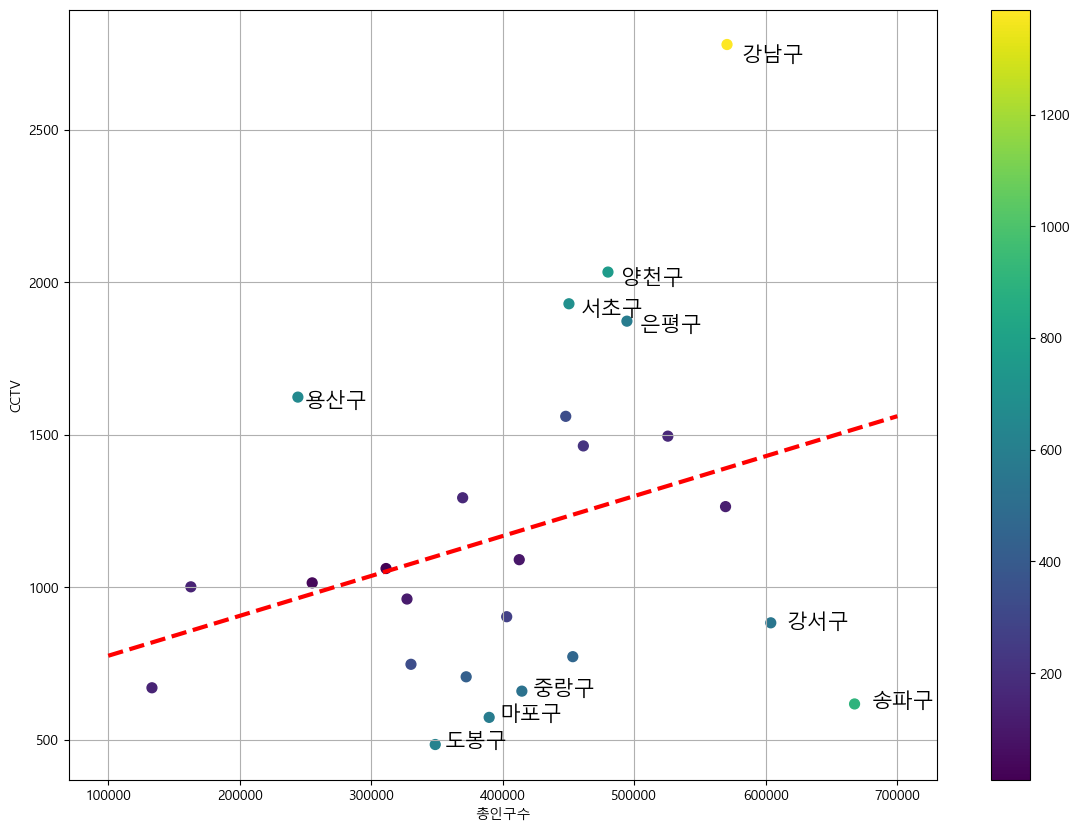

In [50]:
plt.figure(figsize=(14,10))
# X축, Y축, 점의 색깔(color)과 크기(size)
plt.scatter(data_result['총인구수'], data_result['소계'],
             c=data_result['오차'], s=50)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='r')

for n in range(10):
    plt.text(df_sort['총인구수'][n]*1.02, df_sort['소계'][n]*0.98,
             df_sort.index[n], fontsize=15)

plt.xlabel('총인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.grid()
plt.show()

## 문제풀이시간

#### 1. 2022년도 4/4분기 인구현황을 파악하고

In [51]:
KOR_Pt = pd.read_excel('../data/주민등록인구_20230628105723.xlsx')
KOR_Pt.head()

C:\ProgramData\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,동별(1),동별(2),2022 4/4,2022 4/4.1,2022 4/4.2,2022 4/4.3,2022 4/4.4,2022 4/4.5,2023 1/4,2023 1/4.1,2023 1/4.2,2023 1/4.3,2023 1/4.4,2023 1/4.5
0,동별(1),동별(2),세대 (세대),계,한국인,등록외국인,세대당인구,65세이상고령자,세대 (세대),계,한국인,등록외국인,세대당인구,65세이상고령자
1,합계,소계,4446296,9667669,9428372,239297,2.12,1667411,4463385,9668008,9426404,241604,2.11,1690961
2,NaN,종로구,72524,152211,141379,10832,1.95,27958,72679,152212,141060,11152,1.94,28265
3,NaN,중구,63139,130785,120437,10348,1.91,25055,63862,131390,120963,10427,1.89,25353
4,NaN,용산구,109805,233284,218650,14634,1.99,39037,109735,232482,217756,14726,1.98,39478


In [52]:
KOR_Pt = pd.read_excel('../data/주민등록인구_20230628105723.xlsx',
                        header = 1,
                        usecols = 'B, D, E, F, H')
KOR_Pt.head()

C:\ProgramData\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,동별(2),계,한국인,등록외국인,65세이상고령자
0,소계,9667669,9428372,239297,1667411
1,종로구,152211,141379,10832,27958
2,중구,130785,120437,10348,25055
3,용산구,233284,218650,14634,39037
4,성동구,288234,281000,7234,47720


In [53]:
KOR_Pt.columns=['구별','총인구수','한국인','외국인','고령자']
KOR_Pt.head(1)

,구별,총인구수,한국인,외국인,고령자
0,소계,9667669,9428372,239297,1667411


In [54]:
KOR_Pt.drop([0], inplace=True)
KOR_Pt.head()

,구별,총인구수,한국인,외국인,고령자
1,종로구,152211,141379,10832,27958
2,중구,130785,120437,10348,25055
3,용산구,233284,218650,14634,39037
4,성동구,288234,281000,7234,47720
5,광진구,351252,337416,13836,54071


In [77]:
KOR_Pt['내국인비율'] = KOR_Pt['한국인'] / KOR_Pt['총인구수'] * 100
KOR_Pt['외국인비율'] = KOR_Pt['외국인'] / KOR_Pt['총인구수'] * 100
KOR_Pt['고령자비율'] = KOR_Pt['고령자'] / KOR_Pt['총인구수'] * 100
KOR_Pt.head()

,구별,총인구수,한국인,외국인,고령자,외국인비율,고령자비율,내국인비율
1,종로구,152211,141379,10832,27958,7.116437,18.367923,92.883563
2,중구,130785,120437,10348,25055,7.912222,19.157396,92.087778
3,용산구,233284,218650,14634,39037,6.273041,16.733681,93.726959
4,성동구,288234,281000,7234,47720,2.509766,16.555993,97.490234
5,광진구,351252,337416,13836,54071,3.939052,15.393791,96.060948


#### 2.  CCTV 관련 최근 3년간 증가율 = ( 2022+2021+2020) / 2019년도 이전 * 100

In [56]:
CCTV_S = pd.read_csv('../data/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv', encoding='cp949', thousands= ',')
CCTV_S.rename(columns={'구분' : '구별', '2013년 이전\n설치된 CCTV' : '2013년 이전'}, inplace=True)
CCTV_S.drop([0], inplace=True)
CCTV_S.head()

,구별,총계,2013년 이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
1,종로구,1980,36,540,107,161,131,158,152,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,중 구,2584,130,87,77,236,240,372,386,155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,용산구,2847,44,50,68,83,295,491,115,322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,성동구,4047,58,99,110,366,279,945,459,647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,광진구,3480,507,82,84,64,21,465,443,709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
CCTV_S.dropna(axis=1, inplace=True)

In [58]:
CCTV_S.head(1)

,구별,총계,2013년 이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
1,종로구,1980,36,540,107,161,131,158,152,69,250,85,291


In [59]:
CCTV_S.loc[:, '2019년 이전'] = CCTV_S.loc[:, '2013년 이전':'2019년'].sum(axis=1)
CCTV_S

,구별,총계,2013년 이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2019년 이전
1,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,1354
2,중 구,2584,130,87,77,236,240,372,386,155,361,403,137,1683
3,용산구,2847,44,50,68,83,295,491,115,322,623,422,334,1468
4,성동구,4047,58,99,110,366,279,945,459,647,485,367,232,2963
5,광진구,3480,507,82,84,64,21,465,443,709,172,662,271,2375
6,동대문구,2759,1,4,12,107,802,711,201,218,223,221,259,2056
7,중랑구,4193,224,331,104,145,153,170,215,1074,976,507,294,2416
8,성북구,4842,137,170,229,322,594,811,867,714,253,407,338,3844
9,강북구,3321,0,21,16,68,210,4,375,963,569,298,797,1657
10,도봉구,2247,103,2,79,72,103,117,200,202,183,600,586,878


In [60]:
CCTV_S = CCTV_S.reindex(['구별', '총계', '2013년 이전', '2013년', '2014년', '2015년', '2016년',
                         '2017년', '2018년','2019년', '2019년 이전', '2020년', '2021년', '2022년'], axis = 1)

CCTV_S.head(0)

,구별,총계,2013년 이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2019년 이전,2020년,2021년,2022년


In [61]:
#최근 3년간 증가율 
CCTV_S['최근 3년간 증가율'] = (CCTV_S['2022년'] + CCTV_S['2021년'] + CCTV_S['2020년']) / CCTV_S['2019년 이전'] * 100
CCTV_S.sort_values(by='최근 3년간 증가율', ascending=False).head(5)

,구별,총계,2013년 이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2019년 이전,2020년,2021년,2022년,최근 3년간 증가율
10,도봉구,2247,103,2,79,72,103,117,200,202,878,183,600,586,155.922551
9,강북구,3321,0,21,16,68,210,4,375,963,1657,569,298,797,100.422450
3,용산구,2847,44,50,68,83,295,491,115,322,1468,623,422,334,93.937330
19,영등포구,4553,109,81,295,360,285,422,803,153,2508,1357,329,359,81.539075
25,강동구,3190,82,195,56,174,226,351,379,362,1825,635,301,429,74.794521


#### 3.  CCTV와 인구 관련 상관관계가  가장 높은 요소를 찾아 내고 최종적으로 의미 있는 그래프를 그려보세요.

In [100]:
df3 = pd.merge(CCTV_S, KOR_Pt, on = '구별')
df3.set_index('구별', inplace=True)
df3.head()

,총계,2013년 이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2019년 이전,...,2021년,2022년,최근 3년간 증가율,총인구수,한국인,외국인,고령자,외국인비율,고령자비율,내국인비율
구별,,,,,,,,,,,,,,,,,,,,,
종로구,1980,36,540,107,161,131,158,152,69,1354,...,85,291,46.233383,152211,141379,10832,27958,7.116437,18.367923,92.883563
용산구,2847,44,50,68,83,295,491,115,322,1468,...,422,334,93.937330,233284,218650,14634,39037,6.273041,16.733681,93.726959
성동구,4047,58,99,110,366,279,945,459,647,2963,...,367,232,36.584543,288234,281000,7234,47720,2.509766,16.555993,97.490234
광진구,3480,507,82,84,64,21,465,443,709,2375,...,662,271,46.526316,351252,337416,13836,54071,3.939052,15.393791,96.060948
동대문구,2759,1,4,12,107,802,711,201,218,2056,...,221,259,34.192607,353601,336644,16957,64468,4.795518,18.231849,95.204482


In [81]:
df3.drop(labels=['2013년 이전', '2013년', '2014년', '2015년', '2016년', '2017년',
                 '2018년','2019년', '2019년 이전', '2020년', '2021년', S'2022년'], axis=1, inplace=True)
df3

,총계,최근 3년간 증가율,총인구수,한국인,외국인,고령자,외국인비율,고령자비율,내국인비율
구별,,,,,,,,,
종로구,1980,46.233383,152211,141379,10832,27958,7.116437,18.367923,92.883563
용산구,2847,93.937330,233284,218650,14634,39037,6.273041,16.733681,93.726959
성동구,4047,36.584543,288234,281000,7234,47720,2.509766,16.555993,97.490234
광진구,3480,46.526316,351252,337416,13836,54071,3.939052,15.393791,96.060948
동대문구,2759,34.192607,353601,336644,16957,64468,4.795518,18.231849,95.204482
중랑구,4193,73.551325,390140,385318,4822,74920,1.235967,19.203363,98.764033
성북구,4842,25.962539,441984,430397,11587,77475,2.621588,17.528915,97.378412
강북구,3321,100.422450,297702,293660,4042,66307,1.357734,22.272944,98.642266
도봉구,2247,155.922551,313989,311694,2295,66998,0.730917,21.337690,99.269083


In [88]:
df3 = df3.reindex(['총계', '최근 3년간 증가율', '총인구수', '한국인',
                   '내국인비율', '외국인', '외국인비율', '고령자','고령자비율'], axis = 1)

df3.head(0)

,총계,최근 3년간 증가율,총인구수,한국인,내국인비율,외국인,외국인비율,고령자,고령자비율
구별,,,,,,,,,


In [89]:
df3.sort_values(by='최근 3년간 증가율', ascending=False).head()

,총계,최근 3년간 증가율,총인구수,한국인,내국인비율,외국인,외국인비율,고령자,고령자비율
구별,,,,,,,,,
도봉구,2247,155.922551,313989,311694,99.269083,2295,0.730917,66998,21.337690
강북구,3321,100.422450,297702,293660,98.642266,4042,1.357734,66307,22.272944
용산구,2847,93.937330,233284,218650,93.726959,14634,6.273041,39037,16.733681
영등포구,4553,81.539075,398085,375675,94.370549,22410,5.629451,64810,16.280443
강동구,3190,74.794521,464037,460067,99.144465,3970,0.855535,78340,16.882274


In [90]:
fp1 = np.polyfit(df3['총인구수'], df3['총계'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

df3['오차'] = np.abs(df3['총계'] - f1(df3['총인구수']))

df_sort = df3.sort_values(by='오차', ascending=False)
df_sort.head()

,총계,최근 3년간 증가율,총인구수,한국인,내국인비율,외국인,외국인비율,고령자,고령자비율,오차
구별,,,,,,,,,,
강남구,7243,35.687523,534103,529102,99.063664,5001,0.936336,81715,15.299483,2923.527039
송파구,3203,28.789706,664514,658801,99.140274,5713,0.859726,103573,15.586278,1709.013460
노원구,2617,40.850377,508014,503734,99.157504,4280,0.842496,92040,18.117611,1583.933964
서초구,4995,59.533695,408451,404325,98.989842,4126,1.010158,62347,15.264254,1246.444361
강서구,3265,70.763598,574638,569166,99.047748,5472,0.952252,97128,16.902467,1238.649366


In [91]:
fp1 = np.polyfit(df3['총인구수'], df3['총계'], 1)
fp1

array([4.54363895e-03, 1.89270177e+03])

In [95]:
np.corrcoef(df3['고령자비율'],df3['총계'])

array([[ 1.        , -0.31763674],
       [-0.31763674,  1.        ]])

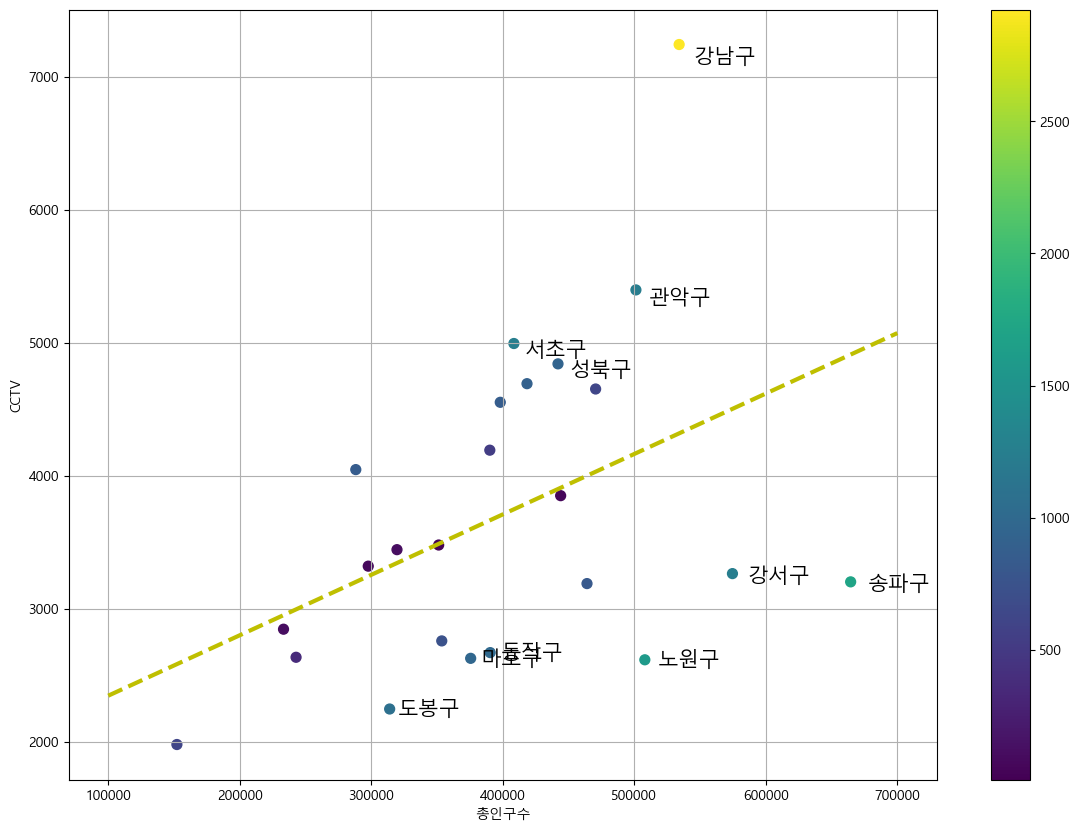

In [98]:
plt.figure(figsize=(14,10))
plt.scatter(df3['총인구수'], df3['총계'],
             c=df3['오차'], s=50)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='y')

for n in range(10):
    plt.text(df_sort['총인구수'][n]*1.02, df_sort['총계'][n]*0.98,
             df_sort.index[n], fontsize=15)

plt.xlabel('총인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.grid()
plt.show()